In [6]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [3]:
def generate_time_series(batch_size, n_steps):
    random = np.random.RandomState(seed=43)
    freq1, freq2, offset1, offset2 = random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time- offset1) * (freq1 * 10+10))
    series += 0.2 * np.sin((time- offset2) * (freq1 * 20+20))
    series += 0.1 * (random.rand(batch_size, n_steps)- 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [4]:
n_steps = 50
series = generate_time_series(10000, 50)

In [22]:
xtrain, ytrain = series[:7000, :n_steps], series[:7000, -1]

In [23]:
xvalid, yvalid = series[7000:9000, :n_steps], series[7000:9000, -1]

In [24]:
xtest , ytest = series[9000:, :n_steps], series[:9000, -1]

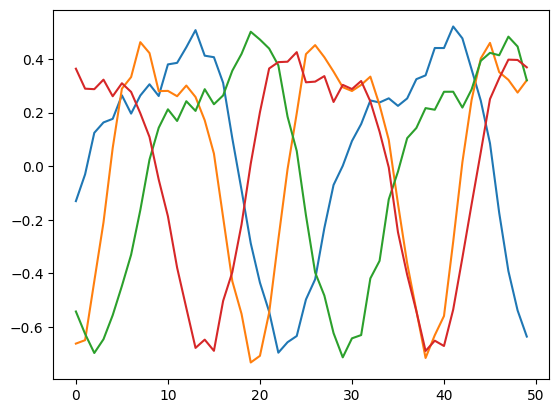

In [25]:
plt.plot(series[0,:])
plt.plot(series[1,:])
plt.plot(series[2,:])
plt.plot(series[3,:])
plt.show()

In [26]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10),
])

In [29]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mse
)
model.fit(xtrain, ytrain)

219/219 [==============================] - 2s 5ms/step - loss: 0.1428


In [ ]:
model.predict()